# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
doc = pd.read_excel('Final_Train.xlsx')

In [3]:
#checking the columns having null values
doc.isnull().any()

Qualification         False
Experience            False
Rating                 True
Place                  True
Profile               False
Miscellaneous_Info     True
Fees                  False
dtype: bool

In [4]:
#Extract the experience as int
doc.Experience = doc.Experience.str.replace(' years experience','').astype(str).astype(int)

In [5]:
doc.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [6]:
# Extract cities
doc["Place"].fillna("Unknown,Unknown",inplace=True)
doc["Place"] = doc["Place"].str.split(",")
doc["City"] = doc["Place"].str[-1]
doc["Place"] = doc["Place"].str[0]

In [7]:
# Seperate Ratings into bins
doc["Rating"].fillna("-99%",inplace=True)
doc["Rating"] = doc["Rating"].str[:-1].astype("int")

In [8]:
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
doc["Rating"] = pd.cut(doc["Rating"],bins=bins,labels=labels,include_lowest=True)

In [9]:
# Extract relevant qualification
doc["Qualification"]=doc["Qualification"].str.split(",")

In [10]:
doc.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,"[BHMS, MD - Homeopathy]",24,10,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,"[BAMS, MD - Ayurveda Medicine]",12,10,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,"[MBBS, MS - Otorhinolaryngology]",9,0,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore
3,"[BSc - Zoology, BAMS]",12,0,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,[BAMS],20,10,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai


In [11]:
#making a dictionary of occuring Qualifications with their numbers
Qualification ={}
for x in doc["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [12]:
#making a list of the top 10 qualifications with their numbers
most_qua = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]

In [13]:
#getting a list of the names of the top 10 Qualifications
final_qua =[]
for tup in most_qua:
    final_qua.append(tup[0])
final_qua

['MBBS',
 'BDS',
 'BAMS',
 'BHMS',
 'MD - Dermatology',
 'MS - ENT',
 'Venereology & Leprosy',
 'MD - General Medicine',
 'Diploma in Otorhinolaryngology (DLO)',
 'MD - Homeopathy']

In [14]:
#Creating new columns for top 10 Qualifications and Setting the value of all titles to 0
for title in final_qua:
    doc[title]=0

In [15]:
#Iterating thru the Qualification column and incrementing each title by 1 to keep track of each doctor's Qualification
for x,y in zip(doc["Qualification"].values,np.array([idx for idx in range(len(doc))])):
    for q in x:
        q = q.strip()
        if q in final_qua:
            doc[q][y] = 1

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
#Dropping the column as we have new columns for each title
doc.drop("Qualification",axis=1,inplace=True)

In [17]:
doc.drop("Miscellaneous_Info",axis=1,inplace=True)

In [18]:
doc.head()

,Experience,Rating,Place,Profile,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Kakkanad,Homeopath,100,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Whitefield,Ayurveda,350,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,Mathikere - BEL,ENT Specialist,300,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Bannerghatta Road,Ayurveda,250,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Keelkattalai,Ayurveda,250,Chennai,0,0,1,0,0,0,0,0,0,0


In [19]:
#Checking for city counts and any wrong entry
doc.City.value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Unknown                  25
e                         1
Name: City, dtype: int64

In [20]:
#Finding the row with the wrong entry 'e'
print(doc.loc[doc['City'] == 'e'])

      Experience Rating Place  Profile  Fees City  MBBS  BDS  BAMS  BHMS  \
3980          23      0     e  Dentist   250    e     0    1     0     0   

      MD - Dermatology  MS - ENT  Venereology & Leprosy  \
3980                 0         0                      0   

      MD - General Medicine  Diploma in Otorhinolaryngology (DLO)  \
3980                      0                                     0   

      MD - Homeopathy  
3980                0  


In [21]:
doc["City"][3980] = "Unknown"
doc["Place"][3980] = "Unknown"

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
#One hot encoding for City and Proifle columns
doc = pd.get_dummies(doc,columns=["City","Profile"],prefix=["City","Profile"])

In [23]:
doc.head()

,Experience,Rating,Place,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,Kakkanad,100,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,Whitefield,350,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,Mathikere - BEL,300,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,Bannerghatta Road,250,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,Keelkattalai,250,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Visualization

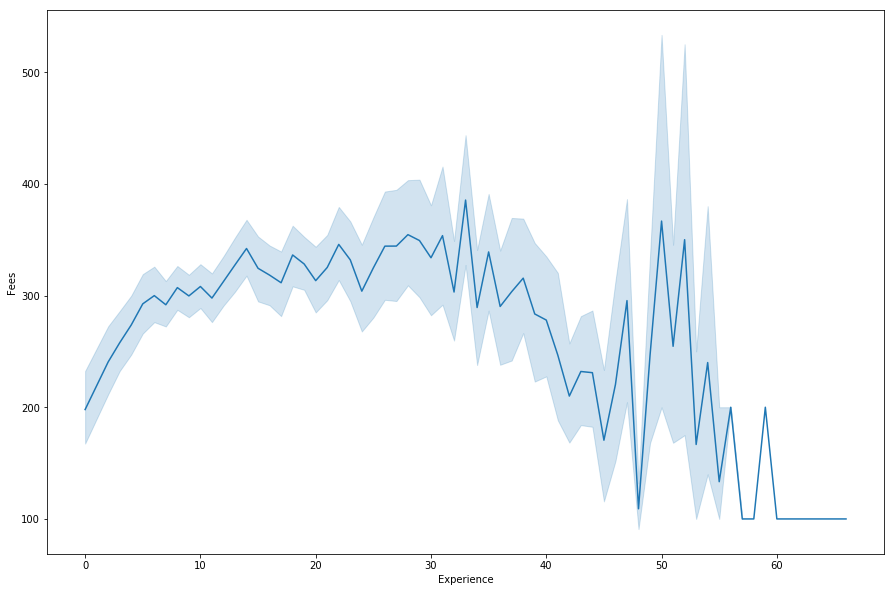

In [24]:
plt.figure(figsize=(15,10))
sns.lineplot(doc.Experience,doc.Fees)

# Algorithm

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_squared_error, accuracy_score, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm

In [26]:
X = doc.drop("Fees",axis=1)
y = doc["Fees"]

In [27]:
# Encoding
enc = OrdinalEncoder()
X = enc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [28]:
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
#support vector machine 
from sklearn.svm import SVR
m = SVR(gamma="scale")
m.fit(scaler.transform(X_train),y_train)

In [30]:
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2

In [31]:
# Define own scorer
scorer = make_scorer(score,greater_is_better=True)
# Hyperparameter tunning
parameters = {"C":[0.1,1,10],"kernel":["linear","rbf","poly"]}
reg = GridSearchCV(m,param_grid=parameters,scoring=scorer,n_jobs=-1,cv=5)
reg.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(score), verbose=0)

In [32]:
y_pred_tuned = reg.predict(scaler.transform(X_test))
score(y_pred_tuned,y_test)

0.8002522645590663

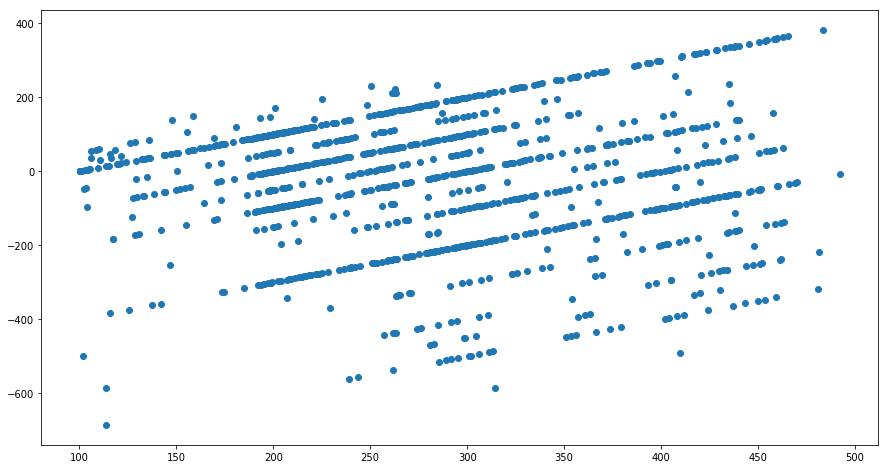

In [33]:
#Residual Plot
plt.figure(figsize=(15,8))
plt.scatter(y_pred_tuned,y_pred_tuned-y_test)

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rfr = RandomForestRegressor()

In [40]:
rfr.fit(scaler.transform(X_train),y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [41]:
y_pred_rfr = rfr.predict(scaler.transform(X_test))

In [42]:
score(y_pred_rfr,y_test)

0.711914103960958